In [1]:
import gensim

import gensim.corpora as corpora
from gensim.models import LdaModel

import utils.filemanagement
from utils.filemanagement import get_project_root
from utils.filemanagement import load_from_file
from pprint import pprint
import os

In [2]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

NUM_TOPICS = 10
TOPN = 20
model_type = "lda"
model_name="LDA"
data_type = "np_mini_raw"
embedding_model = "preliminary"
file_name = f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"

file_name_data = f"{data_type}.csv"
folder_path_word_cloud = f"preprocessed_data/wordclouds/preliminary/{file_name}"
folder_name = f"Preliminary-experiment/models/{model_type}"
random_sample = False
df = load_from_file(folder_path_data,file_name_data)
seed = 42
folder_name = f"Preliminary-experiment/models/{model_type}"

ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

In [3]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations


data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))


data_words = list(sent_to_words(new_data))

In [4]:
import os
from gensim.models import LdaMulticore

id2word = corpora.Dictionary(data_words)
texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]
folder_name = f"Preliminary-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)

try:
    lda = LdaMulticore.load(file_path)
except:
    lda = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=NUM_TOPICS,
                                       random_state=42,
                                       #chunksize=100,
                                       #passes=15,
                                       #per_word_topics=True
                                      )
    LdaMulticore.save(lda, file_path)

In [5]:
lda.get_topics()

array([[9.3282593e-05, 3.1225046e-04, 4.2372083e-04, ..., 1.7069120e-06,
        1.4530482e-06, 1.7911080e-06],
       [6.1034112e-05, 3.3055348e-04, 3.6881369e-04, ..., 2.3083592e-06,
        2.3083583e-06, 2.3083605e-06],
       [1.0101065e-04, 2.2937462e-04, 4.9919146e-04, ..., 2.5049133e-06,
        2.2694053e-06, 2.4375968e-06],
       ...,
       [5.8937792e-05, 1.7605342e-04, 3.3245888e-04, ..., 1.0086527e-06,
        1.0085838e-06, 1.0089160e-06],
       [9.1717840e-05, 3.9284068e-04, 5.2427751e-04, ..., 1.3881787e-06,
        1.3630060e-06, 1.3655053e-06],
       [5.4477136e-05, 2.9099255e-04, 3.4624935e-04, ..., 3.6543233e-06,
        3.6543233e-06, 3.6543247e-06]], dtype=float32)

In [6]:
lda.get_topic_terms(0,5)

[(44, 0.037638575),
 (220, 0.030868066),
 (174, 0.030667914),
 (56, 0.029131273),
 (72, 0.022300383)]

In [7]:
topic_words = [[] for i in range(NUM_TOPICS)]

for i in range(NUM_TOPICS):
    r = lda.get_topic_terms(i,TOPN)
    for item in r:
        topic_words[i].append(id2word[item[0]])

In [8]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, topic_words[i]) for i in range(NUM_TOPICS)]

folder_path_topics = r"preprocessed_data/results"

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [9]:

# Print the Keyword in the 10 topics
pprint(lda.print_topics())
doc_lda = lda[corpus]

[(0,
  '0.038*"det" + 0.031*"som" + 0.031*"og" + 0.029*"er" + 0.022*"for" + '
  '0.021*"at" + 0.018*"til" + 0.018*"har" + 0.017*"vi" + 0.016*"pa"'),
 (1,
  '0.037*"det" + 0.031*"og" + 0.027*"er" + 0.024*"at" + 0.021*"til" + '
  '0.018*"for" + 0.016*"som" + 0.014*"av" + 0.014*"pa" + 0.013*"jeg"'),
 (2,
  '0.039*"og" + 0.037*"det" + 0.031*"er" + 0.031*"at" + 0.020*"vi" + '
  '0.019*"har" + 0.018*"pa" + 0.017*"til" + 0.016*"for" + 0.016*"en"'),
 (3,
  '0.036*"det" + 0.031*"og" + 0.027*"at" + 0.024*"er" + 0.017*"pa" + '
  '0.016*"for" + 0.015*"til" + 0.014*"som" + 0.014*"har" + 0.013*"ikke"'),
 (4,
  '0.032*"og" + 0.029*"det" + 0.027*"er" + 0.027*"at" + 0.023*"som" + '
  '0.022*"til" + 0.021*"vi" + 0.018*"har" + 0.018*"for" + 0.015*"pa"'),
 (5,
  '0.056*"det" + 0.035*"er" + 0.028*"som" + 0.026*"at" + 0.025*"og" + '
  '0.021*"til" + 0.019*"for" + 0.018*"har" + 0.018*"en" + 0.017*"pa"'),
 (6,
  '0.030*"og" + 0.020*"det" + 0.019*"at" + 0.018*"til" + 0.017*"av" + '
  '0.016*"som" + 0.016*"er" 

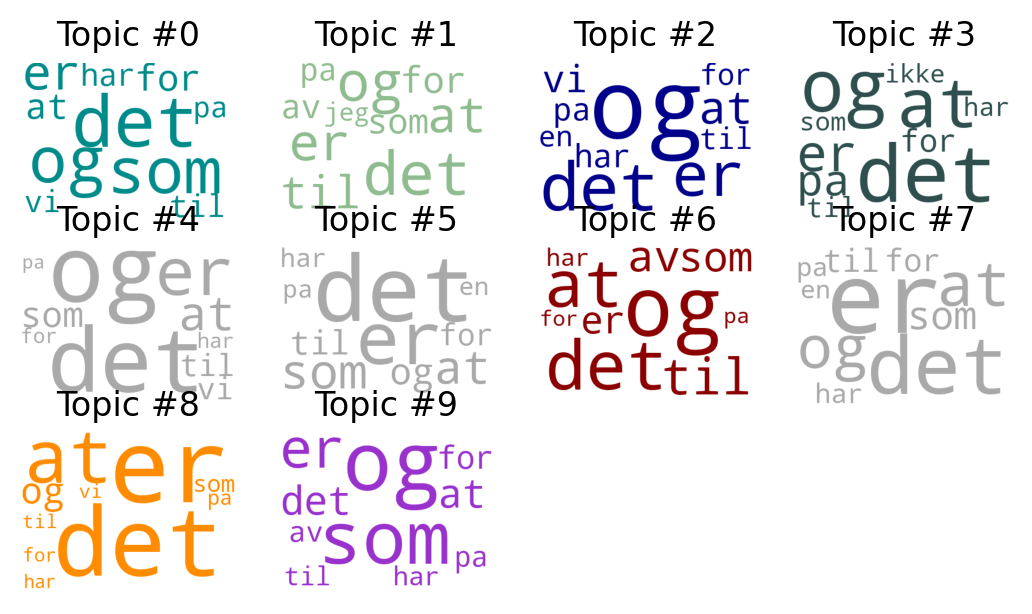

In [10]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds([dict(lda.show_topic(i)) for i in range(NUM_TOPICS)], f"{model_name}: {data_type}", NUM_TOPICS, dpi=200)

In [11]:
formatted_topics = [dict(lda.show_topic(i)) for i in range(NUM_TOPICS)]

In [12]:
reck = [dict(lda.show_topic(i)) for i in range(NUM_TOPICS)]
print(reck)

[{'det': 0.037638575, 'som': 0.030868066, 'og': 0.030667914, 'er': 0.029131273, 'for': 0.022300383, 'at': 0.020954793, 'til': 0.018365394, 'har': 0.017840344, 'vi': 0.01743388, 'pa': 0.015841642}, {'det': 0.037155785, 'og': 0.030645084, 'er': 0.027023183, 'at': 0.024377884, 'til': 0.020656489, 'for': 0.018140214, 'som': 0.016010294, 'av': 0.014453001, 'pa': 0.014405466, 'jeg': 0.013007392}, {'og': 0.039153606, 'det': 0.036974076, 'er': 0.030944504, 'at': 0.030601872, 'vi': 0.020296061, 'har': 0.019179396, 'pa': 0.018367806, 'til': 0.016873706, 'for': 0.01644517, 'en': 0.015701411}, {'det': 0.036118023, 'og': 0.030903593, 'at': 0.026694942, 'er': 0.023512773, 'pa': 0.01734828, 'for': 0.015698386, 'til': 0.015361213, 'som': 0.013849472, 'har': 0.013824709, 'ikke': 0.01315005}, {'og': 0.031500645, 'det': 0.029332032, 'er': 0.027023444, 'at': 0.026561497, 'som': 0.022987442, 'til': 0.022252258, 'vi': 0.021436673, 'har': 0.018200744, 'for': 0.01818802, 'pa': 0.014850538}, {'det': 0.05561343

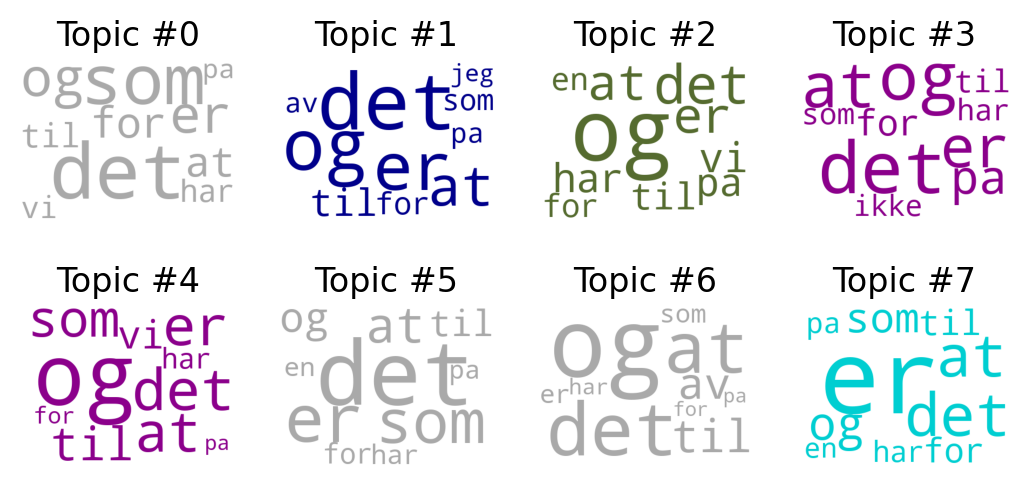

In [13]:
from utils.filemanagement import make_excerpt_wordcloud


excerpt_wordcloud = make_excerpt_wordcloud(formatted_topics,NUM_TOPICS,f"Sample from {model_name}-{embedding_model}: {data_type}",random_sample=random_sample,seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

In [14]:
from utils.tables_and_plots import create_wordcloud



wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))

file_name_model = "wordcloud"
for i in range(NUM_TOPICS):
    topic_wordcloud = create_wordcloud(dict(lda.show_topic(i)))
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [15]:
lda.show_topic(1)

[('det', 0.037155785),
 ('og', 0.030645084),
 ('er', 0.027023183),
 ('at', 0.024377884),
 ('til', 0.020656489),
 ('for', 0.018140214),
 ('som', 0.016010294),
 ('av', 0.014453001),
 ('pa', 0.014405466),
 ('jeg', 0.013007392)]

In [16]:
# Save topic words of model to file

topics = lda.show_topics(num_words=20, formatted=False)
topic_words = []
for i in range(len(topics)):
    topic_word_list = []
    for j in range(len(topics[i][1])):
        topic_word_list.append(topics[i][1][j][0])
    topic_words.append((i, topic_word_list))


folder_path_topics = r"preprocessed_data/results"


write_topics_file(folder_path_topics, file_name, topic_words)

In [17]:
from utils.filemanagement import load_model_topics

folder_path_topics = r"preprocessed_data/results"

loaded_topics = load_model_topics(folder_path_topics, file_name)

folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [18]:
from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [19]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [20]:
from utils.stats import compute_metrics

coherence, diversity = compute_metrics(
    loaded_topics.values(), word_frequencies, word_co_frequencies, 10)

10
('det', 'som') wordtuple
('det', 'som') wordup
555051.0 over
1051498153.0 under
-10.887538358119151 -19.082260811785517 0.5705580940071225 ('det', 'som') 555051 42607 24679
('det', 'og') wordtuple
('det', 'og') wordup
678738.0 over
1309142682.0 under
-10.913479936643508 -19.372495260917674 0.5633492118416209 ('det', 'og') 678738 42607 30726
('det', 'er') wordtuple
('det', 'er') wordup
760498.0 over
1431083916.0 under
-10.877876197073403 -19.536584928311797 0.556795173618575 ('det', 'er') 760498 42607 33588
('det', 'for') wordtuple
('det', 'for') wordup
419989.0 over
823678524.0 under
-10.937514115555574 -18.679992016963283 0.5855202778257736 ('det', 'for') 419989 42607 19332
('at', 'det') wordtuple
('at', 'det') wordup
582267.0 over
1158228688.0 under
-10.957951659534366 -19.151321330740984 0.5721773171830746 ('at', 'det') 582267 42607 27184
('det', 'til') wordtuple
('det', 'til') wordup
420710.0 over
846728911.0 under
-10.974858324009793 -18.682466584863334 0.5874416139944658 ('det

In [21]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.06049990254903938


In [22]:
print(diversity)
print(coherence)

0.14
0.8713262845060077


In [23]:
# Check the stats for the dataset after running basic pipeline
from tabulate import tabulate
import csv
models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒═════════════════════════════╤═══════════╤══════════╕
│ Model                       │ Metric    │    Value │
╞═════════════════════════════╪═══════════╪══════════╡
│ lda_preliminary_np_mini_raw │ coherence │ 0.871326 │
├─────────────────────────────┼───────────┼──────────┤
│ lda_preliminary_np_mini_raw │ diversity │ 0.14     │
╘═════════════════════════════╧═══════════╧══════════╛


In [24]:
# Save all topic stats to file

topic_stats_folder_path = f"preprocessed_data/metrics/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})